# **Ex3 - Advanced Techniques**

## Names and IDs

1.   Tomer Katzav 207219783
2.   Noam Cohen 209263805

## 1. Fuel efficiency price prediction (35 points)
In this section we will use regression tree model for predicting the fuel efficiency for different cars


The features data available here:
https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv

The labels are here:
https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv


In [ ]:
import numpy as np
# load the data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Inspect the data
y = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
X = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')
print("Features (X) data:")
print(X.head())
print("\nLabels (y) data:")
print(y.head())

# Display statistical summary
print("\nStatistical summary of features (X):")
print(X.describe())
print("\nStatistical summary of labels (y):")
print(y.describe())



Features (X) data:
   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0        8.0         307.0       130.0     NaN          12.0        70.0   
1        8.0         350.0       165.0  3693.0          11.5        70.0   
2        NaN         318.0       150.0  3436.0          11.0         NaN   
3        8.0         304.0         NaN     NaN           NaN        70.0   
4        8.0         302.0         NaN  3449.0          10.5        70.0   

  Origin  
0    USA  
1    USA  
2    NaN  
3    NaN  
4    USA  

Labels (y) data:
    MPG
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0

Statistical summary of features (X):
        Cylinders  Displacement  Horsepower       Weight  Acceleration  \
count  307.000000    288.000000  284.000000   293.000000    305.000000   
mean     5.527687    199.633681  105.109155  2975.184300     15.618689   
std      1.702089    103.550163   38.472863   842.988873      2.825252   
min      3.000000     68.000000   46.000000  1613.000000  

### EDA visuallization (5pts)

Explore the data. What features are meaningful? what are the correlated features? display statistcs about the data itself including it's value ranges.

First few rows of features data:
Features (X) data:
   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0        8.0         307.0       130.0     NaN          12.0        70.0   
1        8.0         350.0       165.0  3693.0          11.5        70.0   
2        NaN         318.0       150.0  3436.0          11.0         NaN   
3        8.0         304.0         NaN     NaN           NaN        70.0   
4        8.0         302.0         NaN  3449.0          10.5        70.0   

  Origin  
0    USA  
1    USA  
2    NaN  
3    NaN  
4    USA  

Labels (y) data:
    MPG
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0

-------------------------------------------------------

Statistical summary of features (X):
        Cylinders  Displacement  Horsepower       Weight  Acceleration  \
count  307.000000    288.000000  284.000000   293.000000    305.000000   
mean     5.527687    199.633681  105.109155  2975.184300     15.618689   
std      1.702089    103.550163   38.47286

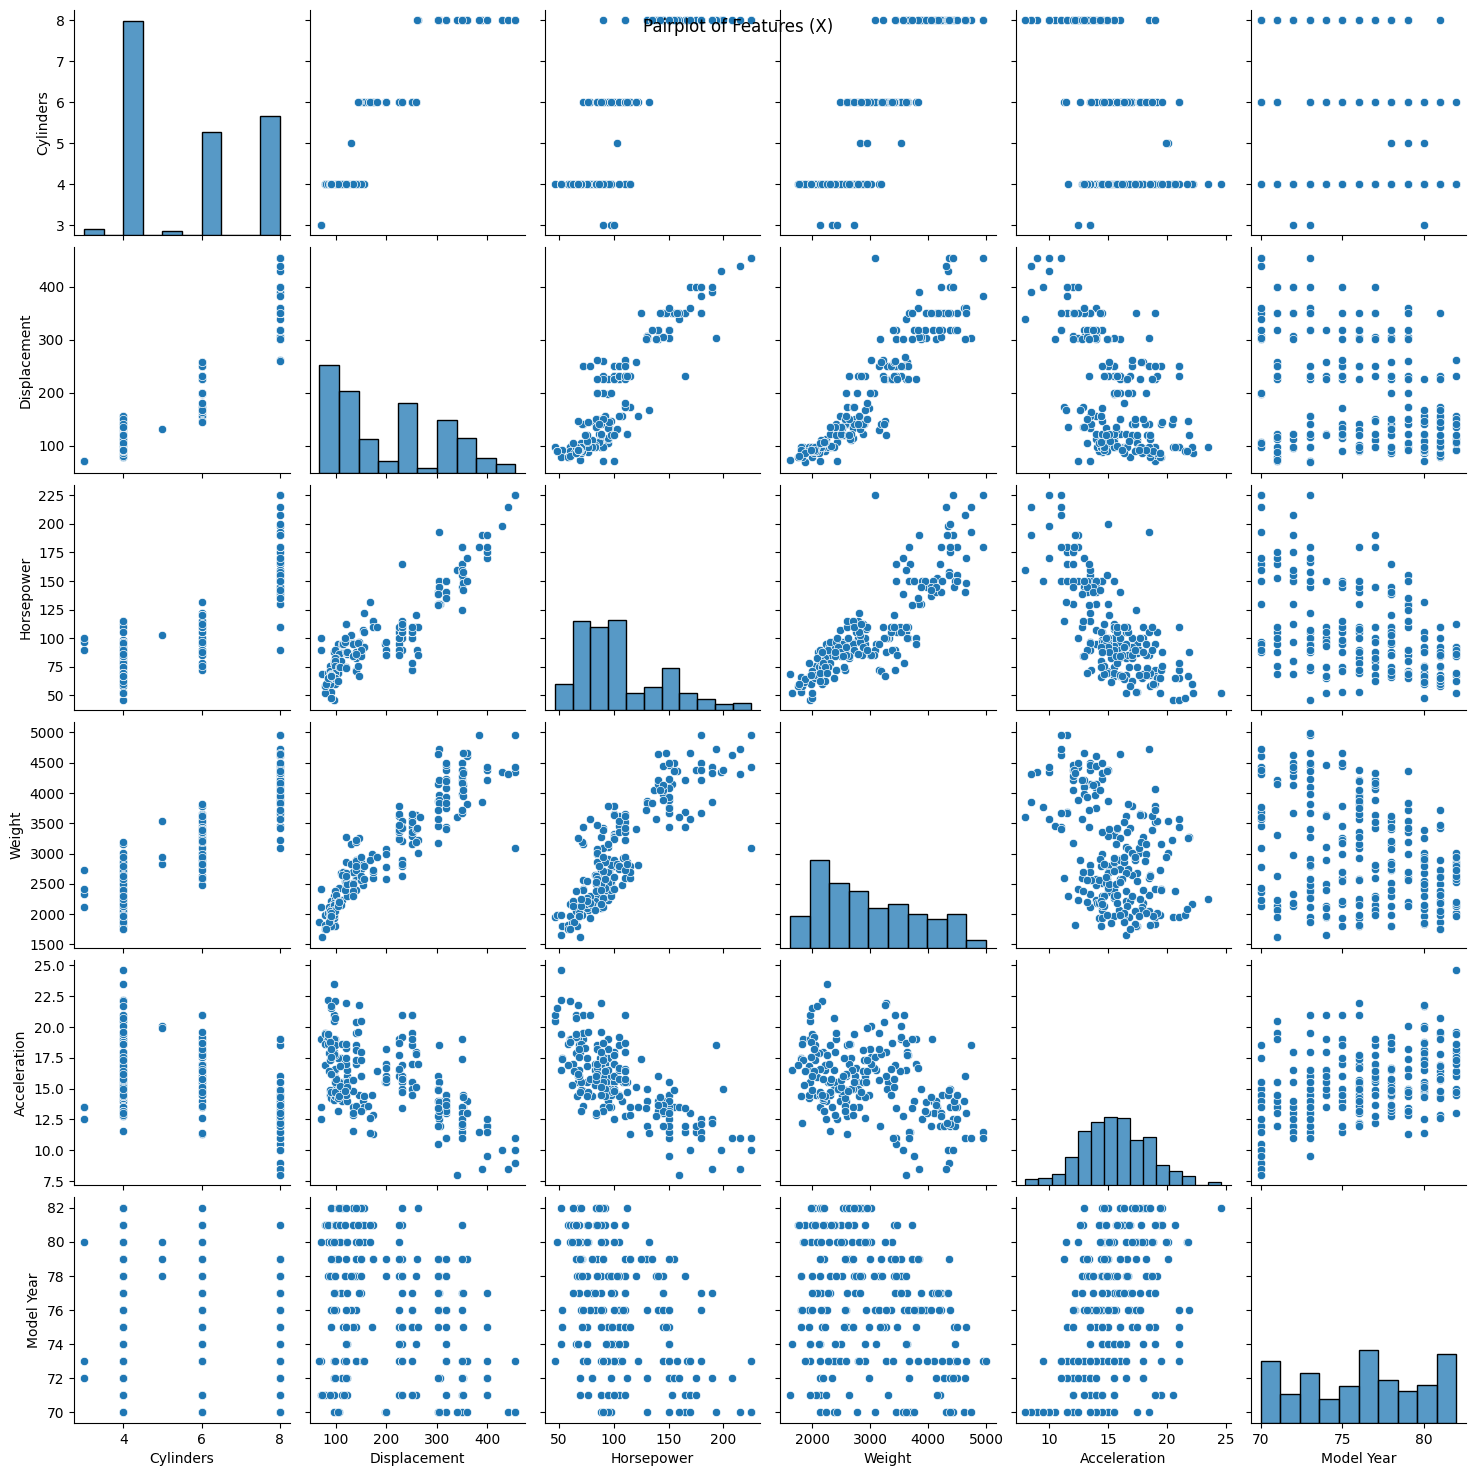

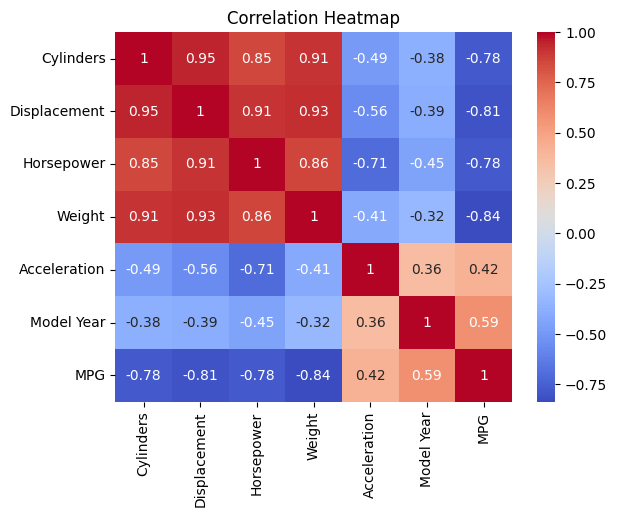


-------------------------------------------------------

Correlated features:
{'Horsepower', 'Weight', 'Displacement'}


In [ ]:
# EDA

y = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
X = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')
# data_df = pd.concat([X, y], axis=1)

# # Select features and target variable
# X = X[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']]
# y = y['MPG']

# Display data
# Display the first few rows of the features data
print("First few rows of features data:")
print("Features (X) data:")
print(X.head())
print("\nLabels (y) data:")
print(y.head())
print("\n-------------------------------------------------------")

# Display summary statistics about the features data
print("\nStatistical summary of features (X):")
print(X.describe())
print("\nStatistical summary of labels (y):")
print(y.describe())
print("\n-------------------------------------------------------")

# Value ranges
# Display value ranges for each feature
print("\nValue ranges for each feature:")
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    min_val = X[col].min()
    max_val = X[col].max()
    print(f"{col}: Min={min_val}, Max={max_val}")

print("\n-------------------------------------------------------")

# Visual exploration
# For features (X)
sns.pairplot(X)
plt.suptitle('Pairplot of Features (X)')
plt.show()

# For labels (y)
# sns.histplot(y.values.flatten(), kde=True)
# plt.title('Histogram of Labels (y)')
# plt.xlabel('MPG (Miles Per Gallon)')
# plt.ylabel('Frequency')
# plt.show()

# Correlation analysis
data_with_labels = pd.concat([X, y], axis=1)
correlation_matrix = data_with_labels.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
print("\n-------------------------------------------------------")
# Correlated features
# Calculate correlation matrix
correlation_matrix = X.corr(numeric_only=True)
# Find correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
# Display correlated features
print("\nCorrelated features:")
print(correlated_features)


### EDA insights (5pts)

What are you insgits based on the previuse visualization?




insgits based on the previuse visualization:

- **Displacement**, **Horsepower** and **Weight** are likely to be meaningful features for predicting fuel efficiency. These features show relatively high correlations with the target variable MPG.

  **Cylinders** might also be a meaningful feature, as it shows a strong correlation with Displacement, Horsepower, and Weight, which are themselves correlated with Fuel Efficiency.

- **Horsepower**, **Displacement** and **Weight** are highly correlated with each other.

  According to the graph you can see that there is a correlation between these variables because you can see a good correlation with a positive slope in the graph, this indicates a good correlation between the variables, when increases in one variable are related to increases in the other variable.

  Additionally, in interpreting a heatmap graph, the use of colors represents the strength and direction of these relationships across the data set. Therefore, according to the graph, you can see that indeed the variables really indicate a correlation with each other.
- The value ranges for each feature vary significantly. For example, the **Weight** feature ranges from 1613 to 4997, while the **Acceleration** feature ranges from 8.0 to 24.6. This indicates that feature scaling might be necessary before fitting the regression model to ensure that features are on similar scales.

### Preprocessing (5pts)

Apply preprocessing according to your data, handle missing values and split the dataset into train-test as well.
Explain the reason for all methods that you apply.

Make sure that it doesn't affect the data charateristics. Which means that the correlations stay the same (if it was not corelated before it shouldn't be now).

In [ ]:
# Preprocessing -

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Handle missing values for numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64'])
imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = imputer.fit_transform(numerical_features)

# Handle missing values for categorical features
# This approach preserve the distribution of the categorical values and minimizes the impact of missing data on downstream analyses
categorical_features = X.select_dtypes(include=['object'])
imputer = SimpleImputer(strategy='most_frequent')
X_categorical_imputed = imputer.fit_transform(categorical_features)

# Encode categorical features
label_encoder = LabelEncoder()
X_categorical_encoded = label_encoder.fit_transform(X_categorical_imputed.ravel()).reshape(X_categorical_imputed.shape)

# Concatenate numerical and categorical features
X_imputed = pd.concat([pd.DataFrame(X_numerical_imputed, columns=numerical_features.columns), pd.DataFrame(X_categorical_encoded, columns=categorical_features.columns)], axis=1)

#######
# For original data:
original_data_with_labels = pd.concat([X, y], axis=1)
original_correlation_matrix = original_data_with_labels.corr(numeric_only=True)

# For preprocessed data:
preprocessed_data_with_labels = pd.concat([X_imputed, y], axis=1)
preprocessed_correlation_matrix = preprocessed_data_with_labels.corr(numeric_only=True)

# Compare the correlation matrices
print("Original Correlation Matrix:")
print(original_correlation_matrix)
print("\n-------------------------------------------------------")
print("\nPreprocessed Correlation Matrix:")
print(preprocessed_correlation_matrix)


Original Correlation Matrix:
              Cylinders  Displacement  Horsepower    Weight  Acceleration  \
Cylinders      1.000000      0.947729    0.849988  0.909916     -0.491934   
Displacement   0.947729      1.000000    0.908120  0.925100     -0.558111   
Horsepower     0.849988      0.908120    1.000000  0.857833     -0.706460   
Weight         0.909916      0.925100    0.857833  1.000000     -0.408763   
Acceleration  -0.491934     -0.558111   -0.706460 -0.408763      1.000000   
Model Year    -0.377363     -0.390007   -0.445445 -0.322180      0.363903   
MPG           -0.779575     -0.806347   -0.777137 -0.837505      0.422525   

              Model Year       MPG  
Cylinders      -0.377363 -0.779575  
Displacement   -0.390007 -0.806347  
Horsepower     -0.445445 -0.777137  
Weight         -0.322180 -0.837505  
Acceleration    0.363903  0.422525  
Model Year      1.000000  0.588143  
MPG             0.588143  1.000000  

-------------------------------------------------------



### Model training and evaluation (10 pts)


Split the data into train-test with 80-20% ratio.
Train the regression tree model on the training set and check it's performance on the test set using two evaluation metrics.
Compare the results and write your conclusion

In [ ]:
# Model training
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the regression tree model
regression_tree = DecisionTreeRegressor(random_state=42)
regression_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_tree.predict(X_test)

In [ ]:
# Evaluation
# Evaluate the model using two evaluation metrics: Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Evaluation Metrics:
Mean Squared Error (MSE): 20.447125
R-squared (R2): 0.6197047159177234


**Mean Squared Error (MSE):**

The MSE obtained from the regression tree model is 20.447125.
The MSE represents the average squared difference between the actual and predicted MPG values. A lower MSE indicates better prediction accuracy.
Compared to a baseline model or other models, the MSE of 20.447125 suggests that the regression tree model performs relatively well in predicting MPG values.

**R-squared (R2):**

The R-squared (R2) obtained from the regression tree model is 0.6197047159177234.
The R2 value measures the proportion of the variance in the MPG values that is predictable from the independent variables. A higher R2 value indicates a better fit of the model to the data.
The R2 value of approximately 0.62 suggests that the regression tree model explains about 62% of the variance in the MPG values

Overall, the regression tree model shows promising performance based on the evaluation metrics. The MSE of 20.447125 indicates decent prediction accuracy, and the R2 value of approximately 0.62 suggests a reasonable fit of the model to the data

### Explainability (10 pts)

1. Use the SHAP tool for explaining how each feature contributes to the model (i,e, explain the training set)
2. Choose 3 different cars  explain thier spesific predictions results (i,e, what was important for this spesific cars)


In [ ]:
pip install shap

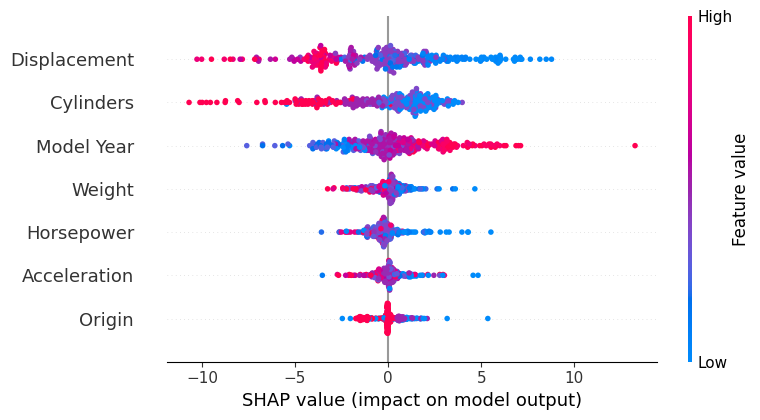

In [ ]:
import shap

# Initialize the SHAP explainer with the trained regression tree model and the training set
explainer = shap.Explainer(regression_tree, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

**answers:**

**1.**

The larger the shap value (X-axis), the more impact the feature has on the model.
Positive SHAP values indicate that the feature increases model output, while negative values indicate a decrease.

With the help of the shap tool, it seems that:
As the Displacment feature gets larger values, it reduces the output of the model. It seems to have a relatively large effect on the model.

The Cylinders feature decreases the output of the model when it gets larger values. It has a relatively large effect on the model.

The Model Year feature increases the output of the model and has a relatively large effect on it.

The features Weight, Horsepower, Acceleration, Origin relatively have no effect on the model, they are close and clustered at the zero line on the x-axis and their colors in the graph are ambiguous.

**2.**

Car A (8 cylinders, 455 displacement, 225 horsepower, 4425 weight, 10 acceleration, 1970 model year, USA origin):

This car likely has a lower fuel efficiency due to its high displacement, weight, and horsepower, which are associated with negative SHAP values. The model year being 1970 also doesn't contribute positively to efficiency. The only slightly positive impact may come from its acceleration feature.


Car B (4 cylinders, 97 displacement, 46 horsepower, Japan origin):

This car would probably be predicted to have higher fuel efficiency. Its low horsepower and displacement align with positive SHAP values. Although the model year isn't specified, assuming it's close to 1970, the impact may be neutral to slightly positive. Being from Japan could positively influence the prediction if the model has learned that Japanese cars from that era were typically more efficient.


Car C (6 cylinders, 199 displacement, 97 horsepower, 2774 weight, 15.5 acceleration, 1970 model year, USA origin):

Car C's prediction for fuel efficiency is likely better than Car A's but not as good as Car B's. It has moderate displacement and horsepower, which are generally associated with lower efficiency, but not to the extent of Car A. The higher acceleration may contribute positively to efficiency. Being from 1970 and the USA might have a slightly negative or neutral contribution according to the SHAP graph.


## 2. Classification evaluation (15 points)

Submit question 2 as a PDF file with the calculations, graphs and explainations.

### ROC and precision recall curve (8 pts)

*Calculate* ROC curve and precision recall curve with the follwing tresholds: [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
The probabilities are:

| label | classifier 1 | classifier 2|
|--------|----------|---------------|
|1|0.41|1.00|
|0	|0.00	|0.72
|0	|0.00	|0.99
|1	|0.73	|0.14
|0	|0.62	|0.00
|1	|1.00	|0.94
|0	|1.00	|0.10
|1	|0.14	|0.77
|0	|0.00	|0.02
|1	|0.55	|1.00






Answer the following questions:
1. Which model is better based on those graphs?
2. If those models predict heart attack, choose a 'one threshold' metric (such as acc, precision, etc..) and explain why it's a suitable metric for this case.

**answers:**

1.
ROC Curve Analysis: The ROC curve shows the trade-off between the true positive rate (TPR) and false positive rate (FPR). Classifier 2 is closer to the top left corner and above the line of Classifier 1 , which indicates a better trade-off between sensitivity and specificity. Classifier 2 has a higher area under the ROC curve (AUC), suggesting it has a better overall performance in distinguishing between the positive and negative classes.
TODO!

The precision-recall curve emphasizes the trade-off between precision and recall (sensitivity). Again, Classifier 2 appears to dominate Classifier 1  for most of the recall range, indicating higher precision across various threshold levels. Especially in regions of higher recall, Classifier 2 maintains higher precision, which is typically more challenging.

**2.**

**Precision** is crucial in the context of predicting heart attacks because it tells us how reliable the positive predictions are. In medical scenarios, especially when dealing with life-threatening conditions like heart attacks, it's essential to minimize false positives - instances where the model predicts a heart attack when it's not actually occurring. False positives can lead to unnecessary stress, anxiety, and potentially harmful interventions such as unnecessary medical procedures or treatments. By focusing on precision, we are prioritizing the reliability of positive predictions. A high precision indicates that when the model predicts a heart attack, it is likely to be correct

### Curves differences (7 pts)

Create a new table with two columns: 'label' and 'predictions'. Fill the table with 10 rows of values representing binary labels and corresponding predicted probabilities.
Ensure that the values chosen for the predictions are deliberately selected to make the ROC curve and precision-recall curve look different - which means that according to one curve the model is good, and according to the second one it's bad.
After filling the table, draw both the ROC curve and precision-recall curve using the provided data.
Explain the values that you chose and the reason for the change.

## 3. Ensembel (40 pts)

### implement adaBoost (25 pts)
implement the adaboost algorithm from scratch, refer to the lecture slides for the algorithm 43.
you may add any helper functions if needed but make sure to add documentation if you do so.
note, the base_estimator in sklearn supports sample_weight, you may use it if you want to.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import numpy as np
from copy import deepcopy


class AdaBoost:
    def __init__(self, n_estimators=50, base_estimator=None):
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.estimators_ = []
        self.alphas_ = []
    def fit(self, X, y):
        # Initialize weights
        sample_weights = np.ones(len(X)) / len(X)

        for _ in range(self.n_estimators):
            # Train weak learner
            weak_learner = deepcopy(self.base_estimator)
            weak_learner.fit(X, y, sample_weight=sample_weights)

            # Predict on training data
            predictions = weak_learner.predict(X)

            # Compute weighted error
            weighted_error = np.sum(sample_weights * (predictions != y))

            # Compute alpha
            alpha = 0.5 * np.log((1 - weighted_error) / max(weighted_error, 1e-10))
            self.alphas_.append(alpha)

            # Update sample weights
            sample_weights *= np.exp(-alpha * y * predictions)
            sample_weights /= np.sum(sample_weights)

            # Save weak learner
            self.estimators_.append(weak_learner)

    def predict(self, X):
        # Initialize predictions
        predictions = np.zeros(len(X))

        for estimator, alpha in zip(self.estimators_, self.alphas_):
            predictions += alpha * estimator.predict(X)

        # Apply sign function to get final predictions
        return np.sign(predictions)


### Model training
train the adaboost model using the synthetic data below, use the following base estimators n_estimators=3,5,10:
1. DecisionTreeClassifier with max_depth=1
2. DecisionTreeClassifier with max_depth=3
3. svm.SVC with kernel='linear'


In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
y[y==0] = -1

### Model comparison (5 pts)
compare the models using the following metrics:
1. accuracy
2. precision

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# Base estimators
base_estimators = [
    DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=3),
    SVC(kernel='linear', probability=True)
]

# Number of estimators for AdaBoost
n_estimators = [3, 5, 10]

# Initialize dictionaries to store metrics
accuracy_scores = {}
precision_scores = {}

for base_estimator in base_estimators:
    accuracy_scores[type(base_estimator).__name__] = []
    precision_scores[type(base_estimator).__name__] = []

    for n in n_estimators:
        # Train AdaBoost model
        adaBoost = AdaBoost(n_estimators=n, base_estimator=base_estimator)
        adaBoost.fit(X, y)

        # Predict
        y_pred = adaBoost.predict(X)

        # Compute metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)

        # Store metrics
        accuracy_scores[type(base_estimator).__name__].append(accuracy)
        precision_scores[type(base_estimator).__name__].append(precision)

# Print results
print("Model Comparison:")
print("\nAccuracy Scores:")
print("{:<25} {:<15} {:<15} {:<15}".format("Base Estimator (Depth)", "n_estimators=3", "n_estimators=5", "n_estimators=10"))
for base_estimator in base_estimators:
    depth = base_estimator.max_depth if hasattr(base_estimator, 'max_depth') else None
    print("{:<25} {:<15.4f} {:<15.4f} {:<15.4f}".format(
        f"{type(base_estimator).__name__} ({depth} depth)" if depth is not None else type(base_estimator).__name__,
        accuracy_scores[type(base_estimator).__name__][0],
        accuracy_scores[type(base_estimator).__name__][1],
        accuracy_scores[type(base_estimator).__name__][2]
    ))

print("\nPrecision Scores:")
print("{:<25} {:<15} {:<15} {:<15}".format("Base Estimator (Depth)", "n_estimators=3", "n_estimators=5", "n_estimators=10"))
for base_estimator in base_estimators:
    depth = base_estimator.max_depth if hasattr(base_estimator, 'max_depth') else None
    print("{:<25} {:<15.4f} {:<15.4f} {:<15.4f}".format(
        f"{type(base_estimator).__name__} ({depth} depth)" if depth is not None else type(base_estimator).__name__,
        precision_scores[type(base_estimator).__name__][0],
        precision_scores[type(base_estimator).__name__][1],
        precision_scores[type(base_estimator).__name__][2]
    ))

Model Comparison:

Accuracy Scores:
Base Estimator (Depth)    n_estimators=3  n_estimators=5  n_estimators=10
DecisionTreeClassifier (1 depth) 0.8570          0.9160          0.9620         
DecisionTreeClassifier (3 depth) 0.8570          0.9160          0.9620         
SVC                       0.8720          0.8700          0.8700         

Precision Scores:
Base Estimator (Depth)    n_estimators=3  n_estimators=5  n_estimators=10
DecisionTreeClassifier (1 depth) 0.8017          0.8835          0.9772         
DecisionTreeClassifier (3 depth) 0.8017          0.8835          0.9772         
SVC                       0.8520          0.8514          0.8514         


### compare number of learners (10 pts)
Choose the best base estimator from the previous section.
Compare the effect of the number of learners on the models error on both the training set and validation set.
use n_estimators = [1,5,10,20,50,100] and plot the error rate for each number of learners.
discuss the results.

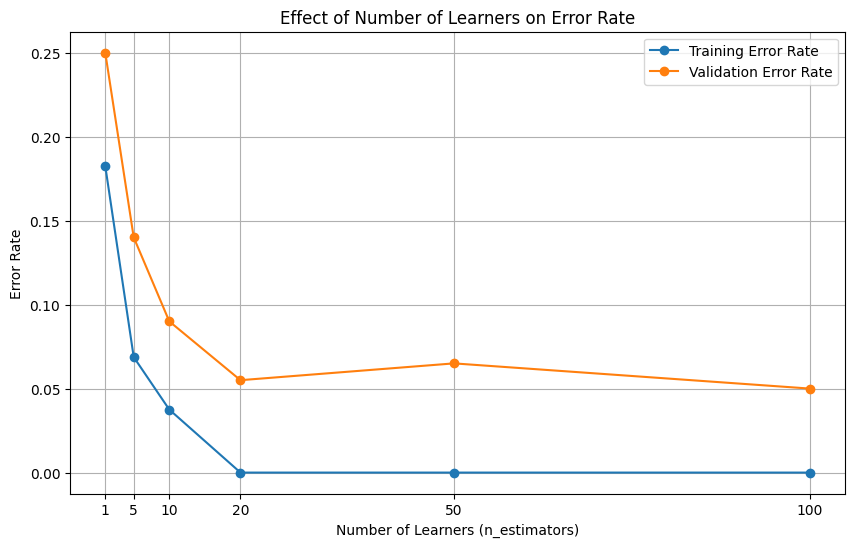

In [ ]:
import matplotlib.pyplot as plt

# Define function to compute error rate
def compute_error_rate(y_true, y_pred):
    return np.mean(y_true != y_pred)

# Generate synthetic data for validation set
X_t, X_val, y_t, y_val = train_test_split(X, y, test_size=0.2, random_state= 42)

# Base estimator (selected as the best from previous comparison)
base_estimator = DecisionTreeClassifier(max_depth=3)

# Number of estimators for AdaBoost
n_estimators = [1, 5, 10, 20, 50, 100]

# Initialize lists to store error rates
train_error_rates = []
val_error_rates = []

for n in n_estimators:
    # Train AdaBoost model
    adaBoost = AdaBoost(n_estimators=n, base_estimator=base_estimator)
    adaBoost.fit(X_t, y_t)

    # Predict on training set
    y_train_pred = adaBoost.predict(X_t)
    train_error_rate = compute_error_rate(y_t, y_train_pred)
    train_error_rates.append(train_error_rate)

    # Predict on validation set
    y_val_pred = adaBoost.predict(X_val)
    val_error_rate = compute_error_rate(y_val, y_val_pred)
    val_error_rates.append(val_error_rate)

# Plot error rates
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_error_rates, label='Training Error Rate', marker='o')
plt.plot(n_estimators, val_error_rates, label='Validation Error Rate', marker='o')
plt.xlabel('Number of Learners (n_estimators)')
plt.ylabel('Error Rate')
plt.title('Effect of Number of Learners on Error Rate')
plt.xticks(n_estimators)
plt.legend()
plt.grid(True)
plt.show()

Discussion of Results:


Training Error Rate:
As the number of learners increases, the training error rate decreases sharply from 1 to 10 learners. This suggests that adding more learners (decision trees, in the case of an ensemble method like AdaBoost or Random Forest) improves the model's ability to fit the training data.
After 10 learners, the training error rate plateaus and remains relatively constant, even as more learners are added. This indicates that beyond a certain point, adding more learners does not significantly improve the model's fit on the training data. It might have reached its capacity to learn from the training data.

Validation Error Rate:
Similar to the training error rate, the validation error rate drops considerably when the number of learners increases from 1 to 10. This demonstrates that the model's generalization to unseen data improves as more learners are integrated.
The validation error decreases at a slower pace after 10 learners and begins to level off around 20 learners. Unlike the training error, the validation error slightly increases as the number of learners goes from 50 to 100. This could be an early sign of overfitting, where the model is becoming too specialized to the training data, negatively impacting its performance on validation data.

Selection of the Best Number of Learners:
The best number of learners would balance a low validation error rate with model complexity. Based on the graph, around 20 learners might be the optimal choice. At this point, the model has a low validation error without showing signs of overfitting, as the error rate starts to plateau.
While the training error continues to decrease slightly past 20 learners, the validation error does not see significant improvement, indicating that additional complexity (more learners) does not yield better generalization.

## 4. SVM (10 points)

Submit question 4 in the pdf file.